In [1]:
# 1. Imports and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram


In [2]:
# 2. Load Dataset
# Ensure the CSV is in your working directory or adjust the path accordingly
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [3]:
# 3. Milestone 1: Data Exploration & Visualization
# 3.1 Descriptive Statistics
print(df.describe(include='all'))

                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110  

In [4]:
# 3.2 Missing Values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


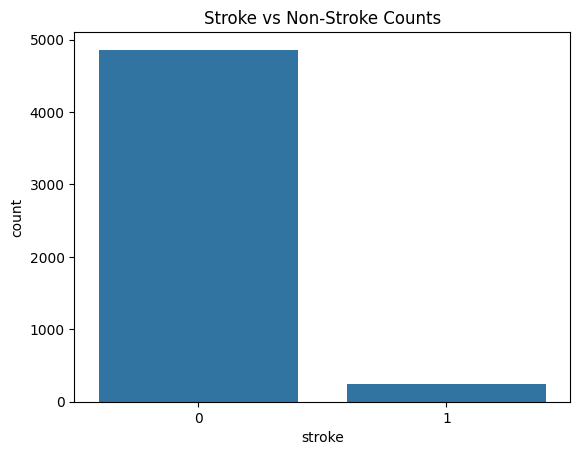

In [5]:
# 3.3 Target Distribution
sns.countplot(x='stroke', data=df)
plt.title('Stroke vs Non-Stroke Counts')
plt.show()

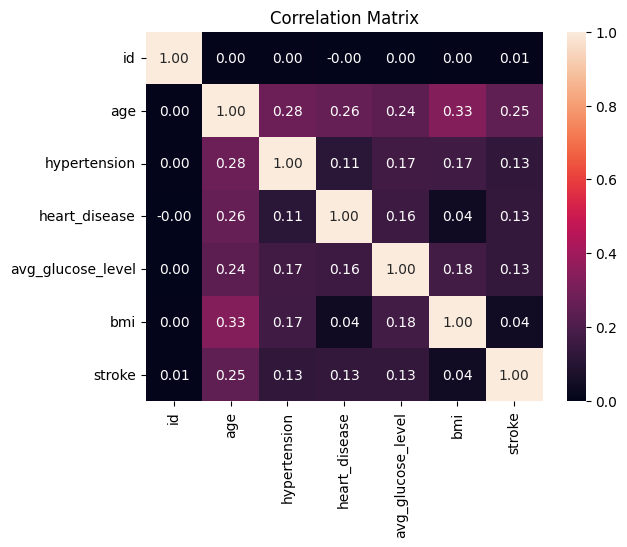

In [6]:
# 3.4 Correlation Heatmap (numeric only)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

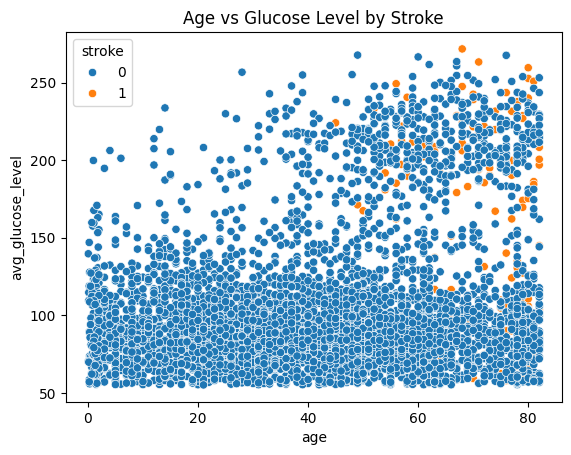

In [7]:
# 3.5 Age vs Glucose vs BMI Scatter
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df)
plt.title('Age vs Glucose Level by Stroke')
plt.show()

In [8]:
# 3.6 PCA, LDA, t-SNE for 2D Visualization
# Preprocess for dimension reduction: drop ID and NaNs
df_dr = df.drop('id', axis=1).dropna()
x_dr = pd.get_dummies(df_dr.drop('stroke', axis=1), drop_first=True)
y_dr = df_dr['stroke']

In [9]:
# Standardize
scaler_dr = StandardScaler()
x_dr_scaled = scaler_dr.fit_transform(x_dr)

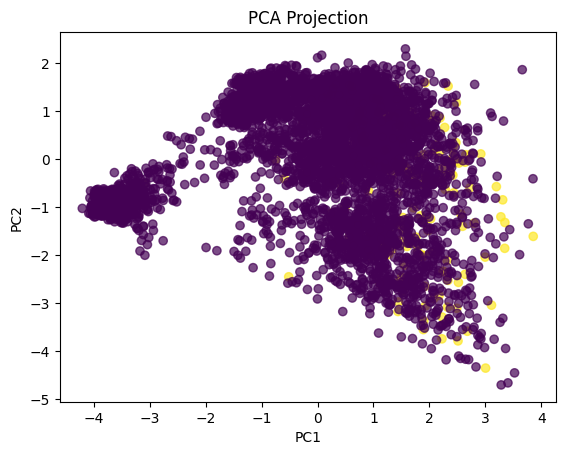

In [10]:
# PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(x_dr_scaled)
plt.figure()
plt.scatter(pc[:,0], pc[:,1], c=y_dr, cmap='viridis', alpha=0.7)
plt.title('PCA Projection')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

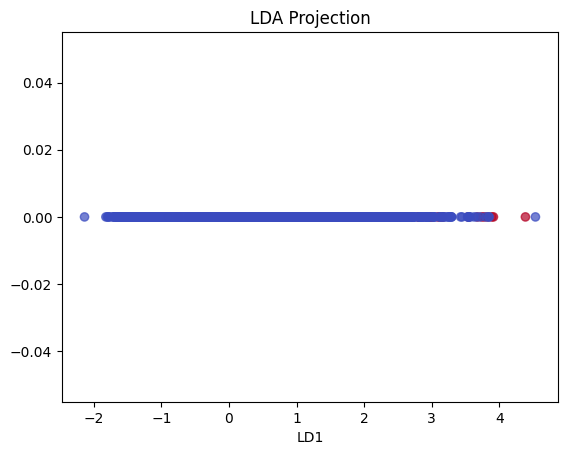

In [11]:
# LDA
lda = LDA(n_components=1)
lda_proj = lda.fit_transform(x_dr_scaled, y_dr)
plt.figure()
plt.scatter(lda_proj, np.zeros_like(lda_proj), c=y_dr, cmap='coolwarm', alpha=0.7)
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.show()

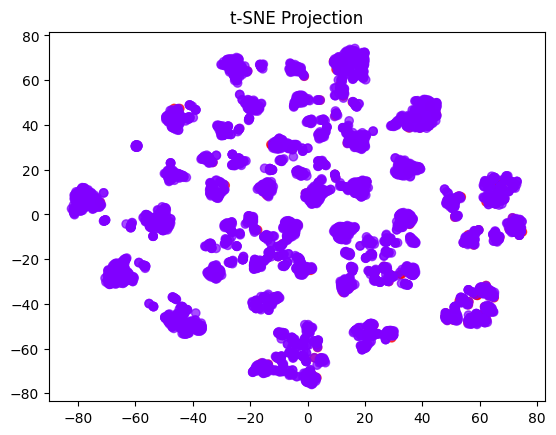

In [12]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_proj = tsne.fit_transform(x_dr_scaled)
plt.figure()
plt.scatter(tsne_proj[:,0], tsne_proj[:,1], c=y_dr, cmap='rainbow', alpha=0.7)
plt.title('t-SNE Projection')
plt.show()


In [13]:
# 4. Milestone 1: Data Cleaning & Preprocessing
# 4.1 Handle missing BMI by median imputation
df['bmi'].fillna(df['bmi'].median(), inplace=True)


C:\Users\acer\AppData\Local\Temp\ipykernel_13696\1894622591.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [14]:
# 4.2 Remove any zero Age or Glucose if biologically invalid
# (if present)
df = df[df['age']>0]
df = df[df['avg_glucose_level']>0]


In [15]:
# 4.3 Encode categorical variables
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [16]:
# 4.4 Split features and target
X = df.drop(['id','stroke'], axis=1)
y = df['stroke']

In [17]:
# 4.5 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
# 4.6 Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# 5. Milestone 1: Training & Testing Classifiers
# 5.1 Naïve Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       972
           1       0.17      0.42      0.24        50

    accuracy                           0.87      1022
   macro avg       0.57      0.66      0.58      1022
weighted avg       0.93      0.87      0.89      1022

Confusion Matrix:
[[866 106]
 [ 29  21]]


In [20]:
# 5.2 Support Vector Machine with Grid Search
svc = SVC(probability=True, random_state=42)
param_svc = {'C':[0.1,1,10], 'kernel':['linear','rbf']}
grid_svc = GridSearchCV(svc, param_svc, cv=5, scoring='f1')
grid_svc.fit(X_train_scaled, y_train)
best_svc = grid_svc.best_estimator_
print("Best SVM Params:", grid_svc.best_params_)
y_pred_svm = best_svc.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Best SVM Params: {'C': 10, 'kernel': 'rbf'}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.33      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.64      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022

Confusion Matrix:
[[968   4]
 [ 48   2]]
